# Final Project: Regression Analysis

Author: Terry Konkin  
Date: April 20, 2025  
Objective: To analyze the Housing Prices Dataset

### Imports

In [1]:
# all imports get moved to the top - import each only once
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


### Section 1. Load and Inspect the Data

1.1 Load the dataset and display the first 10 rows.

In [2]:
# load the datasets
housing_train = pd.read_csv("data/train.csv", sep=",")
housing_test = pd.read_csv("data/test.csv", sep=",")


In [3]:
# display the first 10 rows of the training set
print(housing_train.head(10))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

1.2 Check for missing values and display summary statistics.

In [4]:
# Check for missing values
housing_train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Display summary statistics
print(housing_train.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Reflection 1:  

What do you notice about the dataset?  
The dataset has already been split into training & test sets.  
  
Are there any data issues?  
LotFrontage has missing values.  
There is no column for total square footage.

### Section 2. Data Exploration and Preparation

2.1 Explore data patterns and distributions

Histogram of year built

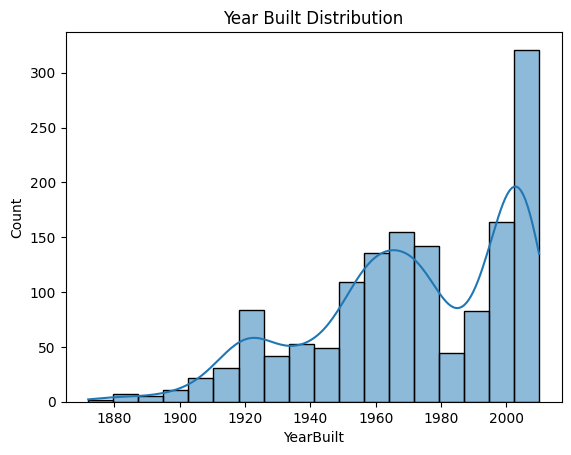

In [6]:
sns.histplot(housing_train['YearBuilt'], kde=True)
plt.title('Year Built Distribution')
plt.show()


Count plot of building type

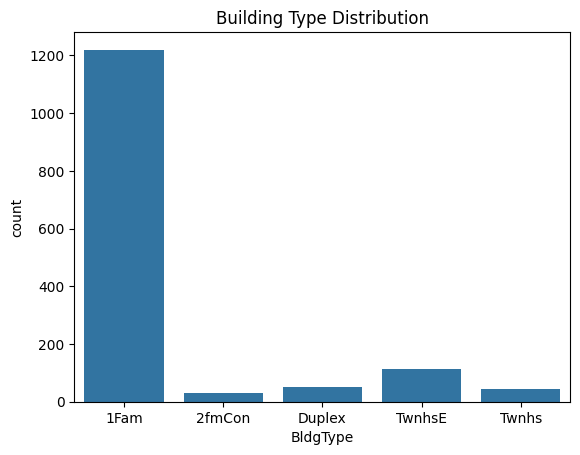

In [8]:
sns.countplot(x='BldgType', data=housing_train)
plt.title('Building Type Distribution')
plt.show()


Scatter matrix of lot area, living area (above grade), year built. 

array([[<Axes: xlabel='LotArea', ylabel='LotArea'>,
        <Axes: xlabel='YearBuilt', ylabel='LotArea'>,
        <Axes: xlabel='GrLivArea', ylabel='LotArea'>],
       [<Axes: xlabel='LotArea', ylabel='YearBuilt'>,
        <Axes: xlabel='YearBuilt', ylabel='YearBuilt'>,
        <Axes: xlabel='GrLivArea', ylabel='YearBuilt'>],
       [<Axes: xlabel='LotArea', ylabel='GrLivArea'>,
        <Axes: xlabel='YearBuilt', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>]], dtype=object)

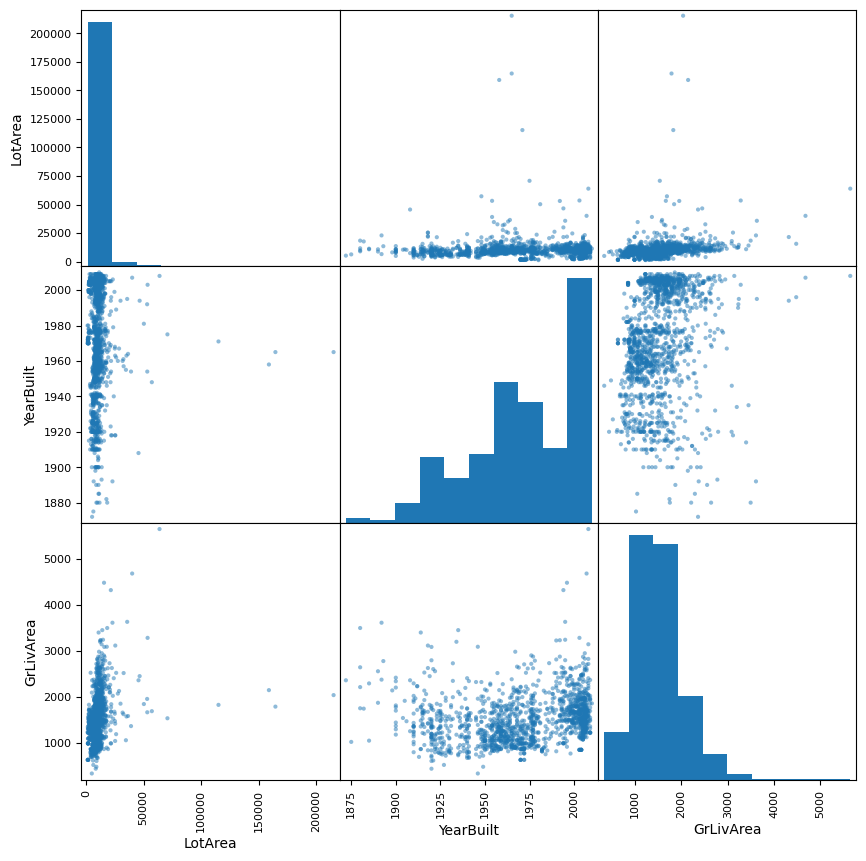

In [7]:
attributes = ['LotArea', 'YearBuilt', 'GrLivArea']
scatter_matrix(housing_train[attributes], figsize=(10, 10))


Check for class imbalance in the target variable.  
For building type, the vast majority is single family detached.

2.2 Handle missing values and clean data

Input missing values for LotFrontage using the median.

In [9]:
housing_train['LotFrontage'].fillna(housing_train['LotFrontage'].median(), inplace=True)

housing_test['LotFrontage'].fillna(housing_test['LotFrontage'].median(), inplace=True)


Convert categorical data in Neighborhood to numerical format.

In [ ]:
housing_train['Neighborhood'] = housing_train['Neighborhood'].map({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'Names': 12, 'NoRidge': 13, 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 16, 'SWISU': 17, 'Sawyer': 18, 'SawyerW': 19, 'Somerst': 20, 'StoneBr': 21, 'Timber': 22, 'Veenker': 23})


2.3 Feature Engineering

Create new feature (total living area square feet)

In [10]:
housing_train['TotalLivArea'] = housing_train['GrLivArea'] + housing_train['BsmtFinSF1']


Reflection 2:  
  
What patterns or anomalies do you see?  
The number of homes built per year fluctuated, but generally increased over the years.  

Do any features stand out?  
Single family far outnumbers all the other housing types.

What preprocessing steps were necessary to clean and improve the data?  
Neighborhood was transformed to numerical, for machine learning purposes.  

Did you create or modify any features to improve performance?  
Total heated square feet was created, to include finished beasment area, and be a better indicator of sale price.

### Section 3. Feature Selection and Justification

3.1 Choose features and target

Select two or more input features

Select a target variable: SalePrice  
This was selected as outlined in the Dataset Options for the Housing Prices Dataset.

3.2 Define X and y

Case 1. Year Built

In [ ]:
# X1 = housing_train[['YearBuilt']]
# y1 = housing_train['SalePrice']


Case 2. Total Heated Square Feet

In [ ]:
# X1 = housing_train[['TotalLivArea']]
# y1 = housing_train['SalePrice']


Case 3. Neighborhood

In [ ]:
# X1 = housing_train[['Neighborhood']]
# y1 = housing_train['SalePrice']


Reflection 3:  
  
Why did you choose these features? How might they impact predictions or accuracy?  

Year Built, because older homes will require more maintenance.  
Total Living SF, because homes in northern states may have a finished basement, which increases total living area.  
Neighborhood, because buyers will pay more for good schools and lower crime rate.

